In [1]:
import matplotlib.pyplot as plt 
from sklearn.datasets import load_iris 
from sklearn.decomposition import PCA

In [2]:
iris = load_iris() 
y = iris.target 
X = iris.data #作为数组，X是几维？ 
X.shape #作为数据表或特征矩阵，X是几维？ 
import pandas as pd 
pd.DataFrame(X)

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [3]:
#调用PCA 
pca = PCA(n_components=2)           #实例化 
pca = pca.fit(X)                    #拟合模型 
X_dr = pca.transform(X)             #获取新矩阵

In [4]:
X_dr
#要将三种鸢尾花的数据分布显示在二维平面坐标系中，对应的两个坐标（两个特征向量）应该是三种鸢尾花降维后的 x1和x2，怎样才能取出三种鸢尾花下不同的x1和x2呢？
 
X_dr[y == 0, 0] #这里是布尔索引，看出来了么？

array([-2.68412563, -2.71414169, -2.88899057, -2.74534286, -2.72871654,
       -2.28085963, -2.82053775, -2.62614497, -2.88638273, -2.6727558 ,
       -2.50694709, -2.61275523, -2.78610927, -3.22380374, -2.64475039,
       -2.38603903, -2.62352788, -2.64829671, -2.19982032, -2.5879864 ,
       -2.31025622, -2.54370523, -3.21593942, -2.30273318, -2.35575405,
       -2.50666891, -2.46882007, -2.56231991, -2.63953472, -2.63198939,
       -2.58739848, -2.4099325 , -2.64886233, -2.59873675, -2.63692688,
       -2.86624165, -2.62523805, -2.80068412, -2.98050204, -2.59000631,
       -2.77010243, -2.84936871, -2.99740655, -2.40561449, -2.20948924,
       -2.71445143, -2.53814826, -2.83946217, -2.54308575, -2.70335978])

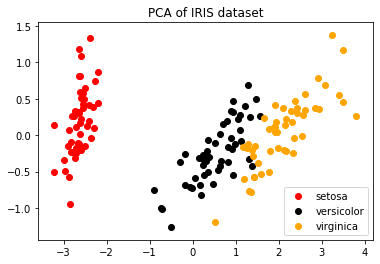

In [5]:
plt.figure() 
plt.scatter(X_dr[y==0, 0], X_dr[y==0, 1], c="red", label=iris.target_names[0]) 
plt.scatter(X_dr[y==1, 0], X_dr[y==1, 1], c="black", label=iris.target_names[1]) 
plt.scatter(X_dr[y==2, 0], X_dr[y==2, 1], c="orange", label=iris.target_names[2]) 
plt.legend() 
plt.title('PCA of IRIS dataset') 
plt.show()

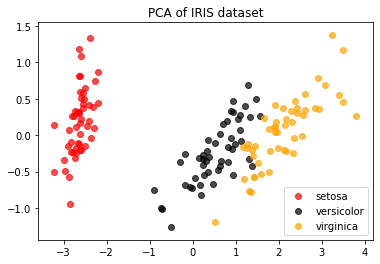

In [6]:
colors = ['red', 'black', 'orange'] 
iris.target_names
 
plt.figure() 
for i in [0, 1, 2]:
    plt.scatter(X_dr[y == i, 0]
                ,X_dr[y == i, 1]
                ,alpha=.7
                ,c=colors[i]
                ,label=iris.target_names[i]
               )
plt.legend()
plt.title('PCA of IRIS dataset') 
plt.show()

In [7]:
#属性explained_variance_，查看降维后每个新特征向量上所带的信息量大小（可解释性方差的大小） 
pca.explained_variance_
 


array([4.22824171, 0.24267075])

In [8]:
#属性explained_variance_ratio，查看降维后每个新特征向量所占的信息量占原始数据总信息量的百分比 #又叫做可解释方差贡献率 
pca.explained_variance_ratio_ #大部分信息都被有效地集中在了第一个特征上


array([0.92461872, 0.05306648])

In [11]:
pca.explained_variance_ratio_.sum() 

0.977685206318795

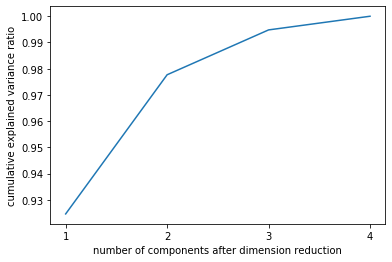

In [10]:
#累积可解释方差贡献率曲线是一条以降维后保留的特征个数为横坐标，降维后新特征矩阵捕捉到的可解释方差贡献 率为纵坐标的曲线，
#能够帮助我们决定n_components好的取值。
import numpy as np 
pca_line = PCA().fit(X) 
plt.plot([1,2,3,4],np.cumsum(pca_line.explained_variance_ratio_)) 
plt.xticks([1,2,3,4]) #这是为了限制坐标轴显示为整数 
plt.xlabel("number of components after dimension reduction") 
plt.ylabel("cumulative explained variance ratio") 
plt.show()

In [13]:
#最大似然估计自选超参数 
pca_mle = PCA(n_components="mle") 
pca_mle = pca_mle.fit(X) 
X_mle = pca_mle.transform(X)

In [14]:
X_mle #可以发现，mle为我们自动选择了3个特征

array([[-2.68412563,  0.31939725, -0.02791483],
       [-2.71414169, -0.17700123, -0.21046427],
       [-2.88899057, -0.14494943,  0.01790026],
       [-2.74534286, -0.31829898,  0.03155937],
       [-2.72871654,  0.32675451,  0.09007924],
       [-2.28085963,  0.74133045,  0.16867766],
       [-2.82053775, -0.08946138,  0.25789216],
       [-2.62614497,  0.16338496, -0.02187932],
       [-2.88638273, -0.57831175,  0.02075957],
       [-2.6727558 , -0.11377425, -0.19763272],
       [-2.50694709,  0.6450689 , -0.07531801],
       [-2.61275523,  0.01472994,  0.10215026],
       [-2.78610927, -0.235112  , -0.20684443],
       [-3.22380374, -0.51139459,  0.06129967],
       [-2.64475039,  1.17876464, -0.15162752],
       [-2.38603903,  1.33806233,  0.2777769 ],
       [-2.62352788,  0.81067951,  0.13818323],
       [-2.64829671,  0.31184914,  0.02666832],
       [-2.19982032,  0.87283904, -0.12030552],
       [-2.5879864 ,  0.51356031,  0.21366517],
       [-2.31025622,  0.39134594, -0.239

In [17]:
#得到了比设定2个特征时更高的信息含量，对于鸢尾花这个很小的数据集来说，3个特征对应这么高的信息含量，
#并不需要去纠结于只保留2个特征
pca_mle.explained_variance_ratio_.sum()

0.9947878161267247

In [18]:
#按信息量占比选超参数
pca_f = PCA(n_components=0.97,svd_solver="full") 
pca_f = pca_f.fit(X) 
X_f = pca_f.transform(X)

In [19]:
pca_f.explained_variance_ratio_

array([0.92461872, 0.05306648])